In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from treehopper.hoppers import hopper, treehopper, RPartition, PCATreePartition
import treehopper.explore as e
from treehopper.utils import haus
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from ipywidgets import interact
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy

In [28]:
rgauss = np.random.normal(size=(10000,2))

In [37]:
h = hopper(rgauss);h.hop(20)

beginning traversal! 10000 items to traverse
beginning traversal! 10000 items to traverse
ind: 9161
current_index: 1759
[1759]
[-5.373744158624446]
checking 1518 points out of 10000
[(-4.30259765678751, 7517), (-4.207621179709855, 7669), (-2.6859091152060928, 7397), (-3.934467169792972, 6109)]
beginning traversal! 10000 items to traverse
ind: 7517
current_index: 9161
[1759, 9161]
[-4.30259765678751, -4.07837200303544]
checking 726 points out of 936
[(-4.07837200303544, 6867), (-2.886565890513918, 3649), (-4.003317663619434, 5149), (-2.8860911979329438, 7918)]
current_index: 1759
[1759, 9161]
[-4.30259765678751, -4.07837200303544]
checking 2294 points out of 9066
[(-3.840456327358422, 8247), (-2.2765222894806074, 9395), (-3.7876692478676417, 5852), (-2.2759171212462403, 8502)]
beginning traversal! 10000 items to traverse
ind: 6867
current_index: 7517
[9161, 1759, 7517]
[-4.07837200303544, -3.840456327358422, -2.9284970049185732]
checking 314 points out of 529
[(-2.9284970049185732, 7664

[(-1.4130903932947303, 7817), (-1.3958207816600683, 2699), (-1.4072951977219332, 441), (-1.3782752141254915, 3959)]
current_index: 7517
[1957, 1759, 6887, 7517, 1971, 6867, 8770, 7543, 7664, 2030, 8398, 3532, 3388, 9261, 9161, 7337, 1555]
[-1.5379863604367268, -1.529919500141185, -1.524154609618046, -1.4481518625215197, -1.4130903932947303, -1.4576866797189665, -1.1644491208811278, -1.3235852157598336, -1.4369086964065934, -1.3591986198006858, -1.315923621683685, -1.1943273175281695, -1.4244877243140275, -1.1001799205014866, -0.891001765550125, -0.920078369287858, -1.1240463248715382]
too far!
current_index: 6887
[1957, 1759, 6887, 7517, 1971, 6867, 8770, 7543, 7664, 2030, 8398, 3532, 3388, 9261, 9161, 7337, 1555]
[-1.5379863604367268, -1.529919500141185, -1.524154609618046, -1.4481518625215197, -1.4130903932947303, -1.4576866797189665, -1.1644491208811278, -1.3235852157598336, -1.4369086964065934, -1.3591986198006858, -1.315923621683685, -1.1943273175281695, -1.4244877243140275, -1.10

[1759,
 9161,
 7517,
 6867,
 1971,
 7664,
 8770,
 7543,
 1957,
 2030,
 8398,
 3532,
 3388,
 6887,
 9261,
 7337,
 1555,
 6919,
 7194,
 8287]

In [38]:
rgauss_h = h.compress(rgauss)

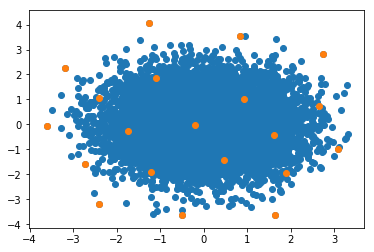

In [41]:
plt.scatter(rgauss[:,0], rgauss[:,1])
plt.scatter(rgauss_h[:,0], rgauss_h[:,1])

In [18]:
x=(1,2,3)

In [25]:
[5,2,3]<[3,2,1]

False

In [4]:
h = treehopper(rgauss, partition=PCATreePartition(rgauss)); h.hop(200)

beginning traversal! 625 items to traverse
beginning traversal! 625 items to traverse
beginning traversal! 625 items to traverse
beginning traversal! 625 items to traverse
beginning traversal! 625 items to traverse
beginning traversal! 625 items to traverse
beginning traversal! 625 items to traverse
beginning traversal! 625 items to traverse
beginning traversal! 625 items to traverse
beginning traversal! 625 items to traverse
beginning traversal! 625 items to traverse
beginning traversal! 625 items to traverse
beginning traversal! 625 items to traverse
beginning traversal! 625 items to traverse
beginning traversal! 625 items to traverse
beginning traversal! 625 items to traverse
Pre-partitioning done, added 0 points
0
hopping with 625 points
radius 2.7188176939023228
continuing
1
hopping with 625 points
radius 2.7188176939023228
beginning traversal! 625 items to traverse


NameError: name 'metric' is not defined

In [33]:
len(h.path)

200

In [34]:
len(h.get_vdict())

adding 18
18 in path
18
adding 21
21 in path
39
adding 8
8 in path
47
adding 6
6 in path
53
adding 18
18 in path
71
adding 5
5 in path
76
adding 23
23 in path
99
adding 21
21 in path
120
adding 5
5 in path
125
adding 6
6 in path
131
adding 17
17 in path
148
adding 13
13 in path
161
adding 4
4 in path
165
adding 6
6 in path
171
adding 5
5 in path
176
adding 24
24 in path
200


200

In [27]:
len(h.path)

20

In [151]:
small = h.compress(rgauss)

In [152]:
sub = [x for x in range(len(h.path)) if small[x,0] > 2]

In [176]:
partition = [1 if small[x,0] > 2 else 2 for x in range(len(h.path)) ]
partition2 = [1 if small[x,0] > -2 else 2 for x in range(len(h.path)) ]

In [187]:
full = h.expand(rgauss, attrs=np.transpose([partition, partition2]))

In [188]:
np.array(full['attrs'])

array([[2, 1],
       [2, 1],
       [2, 1],
       ...,
       [2, 2],
       [2, 1],
       [2, 1]])

In [ ]:
plt.scatter(rgauss[:,0],rgauss[:,1])

In [164]:
smaller = h_even.compress(rgauss)

In [165]:
smaller.shape

(8, 2)

In [166]:
smallish = e.expand(h_even, rgauss)

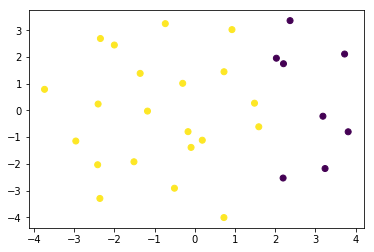

In [168]:
# plt.scatter(rgauss[:,0],rgauss[:,1])
# plt.scatter(smallish[:,0],smallish[:,1])
plt.scatter(small[:,0],small[:,1], c=partition)
#plt.scatter(rgauss[h.path,0],rgauss[h.path,1])
#plt.scatter(smaller[:,0],smaller[:,1])

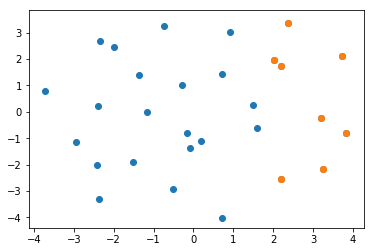

In [158]:
plt.scatter(small[:,0],small[:,1])
plt.scatter(smaller[:,0],smaller[:,1])


In [208]:
g = haus(rgauss, range(200), max_mem = 100)

0
14.306913867721205
14.306913867721205
14.306913867721205
14.337030354931947
14.337030354931947
14.337030354931947
14.344961033507587
14.344961033507587
14.344961033507587
14.2046029010915
14.344961033507587
14.344961033507587
14.388779794108537
14.388779794108537
14.388779794108537
14.356023112011846
14.388779794108537
14.388779794108537
14.15354257769574
14.388779794108537
14.388779794108537
14.676659652098992
14.676659652098992
14.676659652098992
14.030889492319472
14.676659652098992
14.676659652098992
14.447333500331313
14.676659652098992
14.676659652098992
14.303495176993758
14.676659652098992
14.676659652098992
14.265532486970145
14.676659652098992
14.676659652098992
14.178579981614721
14.676659652098992
14.676659652098992
14.09637270697114
14.676659652098992
14.676659652098992
14.414954392900043
14.676659652098992
14.676659652098992
14.368666332459687
14.676659652098992


In [209]:
g

14.676659652098992

In [117]:
fullgauss = sc.AnnData(rgauss)

In [118]:
h = treehopper(rgauss, partition=RPartition, max_partition_size=10, splits=float('inf'));h.hop(500)
h.get_vcells()

Pre-partitioning...
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning trav

beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to t

beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to traverse
beginning traversal! 10 items to t

radius 2.0482579888140617
beginning traversal! 10 items to traverse
checking 8 points
169
hopping with 10 points
radius 2.0426538994363503
beginning traversal! 10 items to traverse
checking 1 points
171
hopping with 10 points
radius 2.041522359760214
beginning traversal! 10 items to traverse
checking 6 points
173
hopping with 10 points
radius 2.0414291096773893
beginning traversal! 10 items to traverse
checking 8 points
175
hopping with 9 points
radius 2.041012335653675
beginning traversal! 9 items to traverse
checking 4 points
177
hopping with 10 points
radius 2.038034667977558
beginning traversal! 10 items to traverse
checking 3 points
179
hopping with 10 points
radius 2.0365047184387737
beginning traversal! 10 items to traverse
checking 5 points
181
hopping with 9 points
radius 2.0354042854393515
beginning traversal! 9 items to traverse
checking 4 points
183
hopping with 10 points
radius 2.0339306124021315
beginning traversal! 10 items to traverse
checking 4 points
185
hopping with 

680
hopping with 9 points
radius 1.5176739326985478
beginning traversal! 9 items to traverse
checking 5 points
682
hopping with 10 points
radius 1.5172622578254609
beginning traversal! 10 items to traverse
checking 3 points
684
hopping with 10 points
radius 1.516429345037835
beginning traversal! 10 items to traverse
checking 7 points
686
hopping with 9 points
radius 1.5139255653973187
beginning traversal! 9 items to traverse
checking 3 points
687
hopping with 10 points
radius 1.5125884176443667
beginning traversal! 10 items to traverse
checking 3 points
689
hopping with 10 points
radius 1.5109234488865866
beginning traversal! 10 items to traverse
checking 2 points
691
hopping with 9 points
radius 1.51028420657525
beginning traversal! 9 items to traverse
checking 7 points
692
hopping with 10 points
radius 1.5089386262961588
beginning traversal! 10 items to traverse
checking 8 points
694
hopping with 10 points
radius 1.5088668513921597
beginning traversal! 10 items to traverse
checking 8

[9215,
 3879,
 6198,
 8028,
 2207,
 5,
 5126,
 1123,
 2320,
 9,
 5824,
 11,
 12,
 8482,
 6126,
 7245,
 4380,
 1353,
 7731,
 19,
 6126,
 2072,
 8453,
 3634,
 8360,
 5572,
 6012,
 4440,
 6214,
 7352,
 4284,
 9328,
 8881,
 3476,
 3075,
 7298,
 3942,
 37,
 6312,
 8685,
 5637,
 5486,
 1159,
 5199,
 8878,
 7809,
 7826,
 3262,
 9895,
 2022,
 9089,
 51,
 8556,
 6554,
 2659,
 6081,
 56,
 8349,
 76,
 6569,
 7521,
 9661,
 7986,
 4312,
 7331,
 3513,
 4530,
 5390,
 8788,
 3634,
 9192,
 2851,
 72,
 6611,
 6468,
 192,
 76,
 77,
 7415,
 9370,
 6667,
 647,
 9540,
 83,
 4145,
 85,
 86,
 2571,
 88,
 588,
 6279,
 8851,
 7731,
 4573,
 3898,
 1890,
 96,
 97,
 98,
 2634,
 8950,
 101,
 2527,
 103,
 9202,
 105,
 3137,
 4533,
 4573,
 9495,
 7399,
 111,
 3960,
 113,
 5484,
 5940,
 1407,
 9192,
 118,
 7352,
 1322,
 3424,
 8861,
 7826,
 8442,
 9974,
 6787,
 7160,
 796,
 6997,
 2934,
 5948,
 7402,
 1776,
 3163,
 8680,
 2130,
 7204,
 6217,
 139,
 7153,
 6651,
 775,
 3938,
 2295,
 5198,
 7166,
 3287,
 1887,
 6649,
 1

In [119]:
smallgauss = e.compress(fullgauss, h)

Trying to set attribute `.obs` of view, making a copy.


computing neighbor graph...
running UMAP...
Louvain clustering...


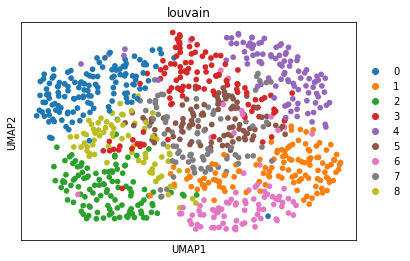

In [120]:
e.viz(smallgauss, rep='X',color='louvain')

In [121]:
h.get_vdict()
ex = e.expand_clusterings(smallgauss, fullgauss, vcells=h.vcells, new_cluster_name = 'louvain_ex')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [122]:
ex

AnnData object with n_obs × n_vars = 10000 × 4 
    obs: 'vcell', 'louvain_ex'

In [123]:
smallgauss = e.compress(fullgauss, h)

Trying to set attribute `.obs` of view, making a copy.


computing neighbor graph...
running UMAP...


... storing 'louvain_ex' as categorical


Louvain clustering...


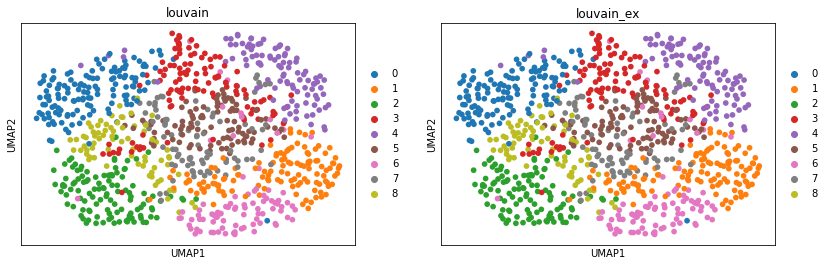

In [124]:
sc.pp.neighbors(smallgauss)
sc.tl.louvain(smallgauss)
e.viz(smallgauss, rep='X', color=['louvain','louvain_ex'], cmap='Set1')

In [86]:
smallgauss.obs['louvain'] == smallgauss.obs['louvain_ex']

6061    True
3388    True
487     True
2229    True
2224    True
1069    True
7872    True
8276    True
5705    True
3777    True
5891    True
9380    True
4516    True
5498    True
8109    True
9345    True
7251    True
6888    True
7720    True
3844    True
3751    True
8253    True
4766    True
8435    True
1922    True
6015    True
2740    True
8366    True
352     True
1064    True
        ... 
8754    True
8701    True
277     True
9716    True
4694    True
8323    True
9495    True
1542    True
1477    True
8137    True
2159    True
5732    True
4079    True
8542    True
2306    True
3116    True
1142    True
4798    True
9799    True
8948    True
3725    True
3648    True
7275    True
7557    True
4885    True
9112    True
1575    True
4763    True
1472    True
9042    True
Name: louvain_ex, Length: 94, dtype: bool

In [40]:
smallgauss.obs['louvain_ex']

757    0
953    2
167    1
619    3
640    0
188    2
512    3
516    0
623    1
395    1
550    2
628    3
180    0
474    0
910    1
66     3
485    2
734    1
665    3
899    1
501    2
730    2
358    0
469    1
577    0
597    0
439    1
878    3
201    0
33     3
738    0
774    0
509    1
5      1
156    1
746    2
907    2
427    2
203    2
985    0
802    3
272    1
73     3
811    1
818    2
277    3
662    2
835    0
986    3
39     0
Name: louvain_ex, dtype: category
Categories (4, object): [0, 1, 2, 3]

[[ 2.79565721e-01]
 [-1.71586287e+00]
 [-1.29359723e+00]
 [ 3.47842903e-01]
 [-1.51431404e+00]
 [ 4.48215135e-01]
 [ 1.27037388e+00]
 [-8.92259835e-01]
 [ 9.08183416e-01]
 [ 1.68146733e-01]
 [ 2.57612247e-01]
 [ 9.21095419e-01]
 [ 1.17849693e-01]
 [-6.43034621e-01]
 [-1.61558750e+00]
 [ 3.99677877e-02]
 [ 1.42777922e-01]
 [-1.73696300e+00]
 [ 8.77373874e-01]
 [ 8.50643310e-01]
 [ 1.69558070e+00]
 [ 1.57995415e+00]
 [ 1.62074511e+00]
 [-3.58904738e-01]
 [ 3.98451805e-01]
 [-2.55998935e+00]
 [-7.55617997e-01]
 [ 1.51739826e+00]
 [ 1.49049055e+00]
 [ 8.27478450e-01]
 [ 4.65717726e-01]
 [ 7.82576447e-01]
 [-3.90070292e-01]
 [ 9.82923953e-01]
 [-7.96721182e-01]
 [ 4.74871348e-01]
 [-6.66684910e-01]
 [ 7.15515324e-01]
 [-1.07770058e+00]
 [ 1.91779441e-01]
 [ 2.93112973e-02]
 [-2.44859416e-01]
 [-4.89608017e-01]
 [ 1.47682902e-01]
 [ 5.86256135e-01]
 [-5.93089091e-01]
 [ 1.72250663e-02]
 [ 3.95707571e-01]
 [-4.42968536e-01]
 [-2.15980667e+00]
 [-4.49507338e-01]
 [-7.60711845e-01]
 [-5.1099975

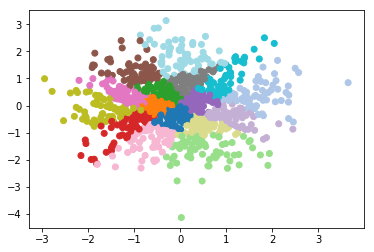

In [10]:
partitions = PCATreePartition(rgauss, max_partition_size=100)
cells = np.array(range(rgauss.shape[0]))
for i,p in enumerate(partitions):
    for row in p:
        cells[row] = i
le = LabelEncoder()
cells = [str(x) for x in cells]
le.fit(cells)
cs = le.transform(cells)
plt.scatter(rgauss[:,0],rgauss[:,1], c=cs, cmap='tab20')

In [81]:
len(np.unique(partitions))

875

Pre-partitioning...
beginning traversal! 125 items to traverse
beginning traversal! 125 items to traverse
beginning traversal! 125 items to traverse
beginning traversal! 125 items to traverse
beginning traversal! 125 items to traverse
beginning traversal! 125 items to traverse
beginning traversal! 125 items to traverse
beginning traversal! 125 items to traverse
Pre-partitioning done, added 0 points
0
hopping with 125 points
radius 3.2162518326839487
continuing
adding 1
1 in path
1
[0 1]


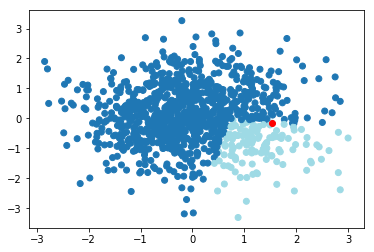

1
hopping with 125 points
radius 3.2162518326839487
beginning traversal! 125 items to traverse
checking 20 points
adding 2
2 in path
2
[0 1 2]


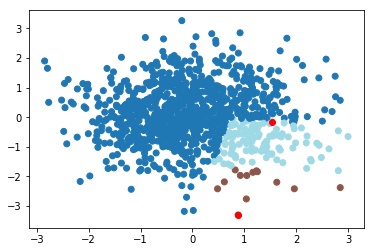

2
hopping with 125 points
radius 2.5969984531731316
continuing
adding 1
1 in path
1
adding 2
2 in path
3
[0 1 2 3]


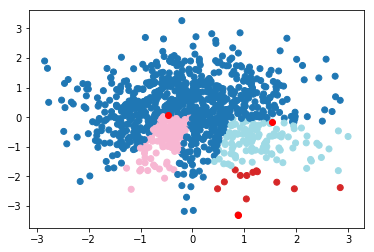

3
hopping with 125 points
radius 2.5969984531731316
beginning traversal! 125 items to traverse
checking 18 points
adding 2
2 in path
2
adding 2
2 in path
4
[0 1 2 3 4]


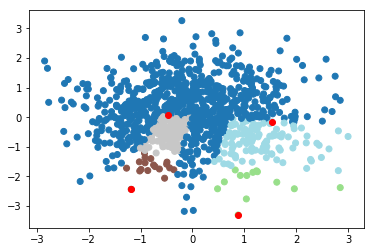

4
hopping with 125 points
radius 2.5085619442158285
continuing
adding 1
1 in path
1
adding 2
2 in path
3
adding 2
2 in path
5
[0 1 2 3 4 5]


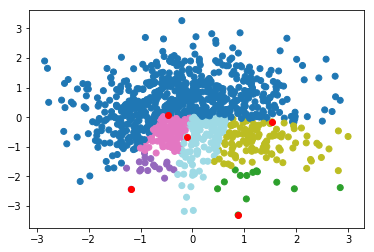

5
hopping with 125 points
radius 2.5085619442158285
beginning traversal! 125 items to traverse
checking 9 points
adding 2
2 in path
2
adding 2
2 in path
4
adding 2
2 in path
6
[0 1 2 3 4 5 6]


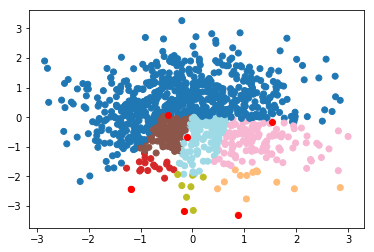

6
hopping with 125 points
radius 2.35222375841315
continuing
adding 1
1 in path
1
adding 2
2 in path
3
adding 2
2 in path
5
adding 2
2 in path
7
[0 1 2 3 4 5 6 7]


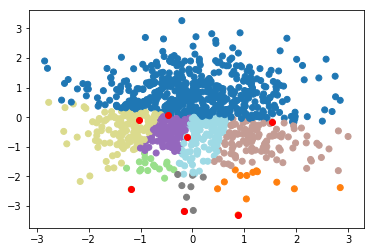

7
hopping with 125 points
radius 2.35222375841315
beginning traversal! 125 items to traverse
checking 15 points
adding 2
2 in path
2
adding 2
2 in path
4
adding 2
2 in path
6
adding 2
2 in path
8
[0 1 2 3 4 5 6 7 8]


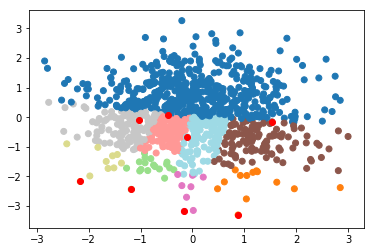

8
hopping with 125 points
radius 2.346311781462921
continuing
adding 1
1 in path
1
adding 2
2 in path
3
adding 2
2 in path
5
adding 2
2 in path
7
adding 2
2 in path
9
[0 1 2 3 4 5 6 7 8 9]


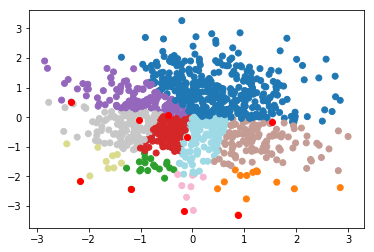

9
hopping with 125 points
radius 2.346311781462921
beginning traversal! 125 items to traverse
checking 88 points
adding 2
2 in path
2
adding 2
2 in path
4
adding 2
2 in path
6
adding 2
2 in path
8
adding 2
2 in path
10
[ 0  1  2  3  4  5  6  7  8  9 10]


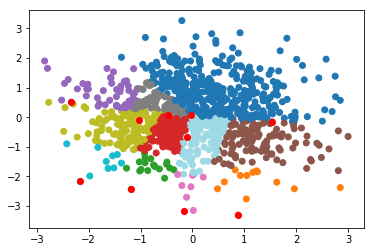

10
hopping with 125 points
radius 2.174145989514346
beginning traversal! 125 items to traverse
checking 43 points
adding 2
2 in path
2
adding 3
3 in path
5
adding 2
2 in path
7
adding 2
2 in path
9
adding 2
2 in path
11
[ 0  1  2  3  4  5  6  7  8  9 10 11]


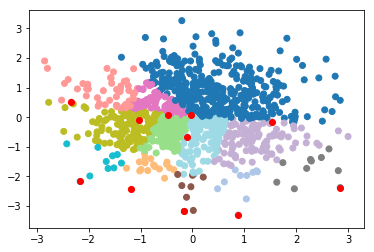

11
hopping with 125 points
radius 1.9214438823563589
continuing
adding 1
1 in path
1
adding 2
2 in path
3
adding 3
3 in path
6
adding 2
2 in path
8
adding 2
2 in path
10
adding 2
2 in path
12
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


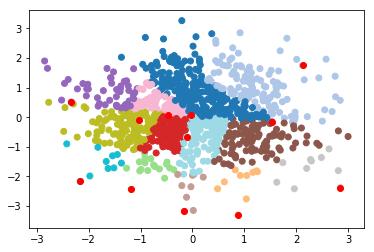

12
hopping with 125 points
radius 1.9214438823563589
beginning traversal! 125 items to traverse
checking 107 points
adding 2
2 in path
2
adding 2
2 in path
4
adding 3
3 in path
7
adding 2
2 in path
9
adding 2
2 in path
11
adding 2
2 in path
13
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


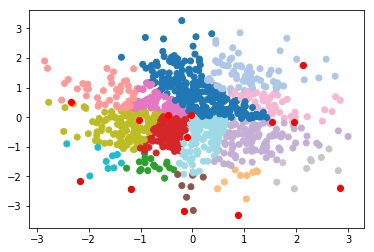

13
hopping with 125 points
radius 1.9064351866025746
beginning traversal! 125 items to traverse
checking 80 points
adding 2
2 in path
2
adding 3
3 in path
5
adding 2
2 in path
7
adding 2
2 in path
9
adding 2
2 in path
11
adding 3
3 in path
14
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


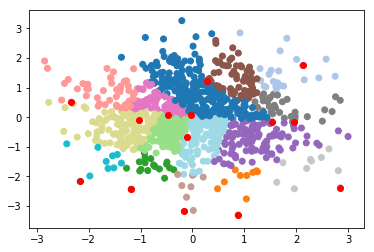

14
hopping with 125 points
radius 1.8450524811586129
beginning traversal! 125 items to traverse
checking 23 points
adding 3
3 in path
3
adding 3
3 in path
6
adding 2
2 in path
8
adding 2
2 in path
10
adding 2
2 in path
12
adding 3
3 in path
15
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


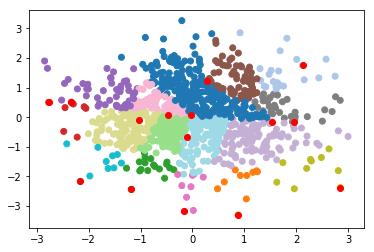

15
hopping with 125 points
radius 1.7438993768647373
continuing
adding 1
1 in path
1
adding 3
3 in path
4
adding 3
3 in path
7
adding 2
2 in path
9
adding 2
2 in path
11
adding 2
2 in path
13
adding 3
3 in path
16
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


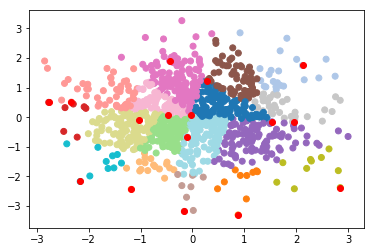

16
hopping with 125 points
radius 1.7438993768647373
beginning traversal! 125 items to traverse
checking 58 points
adding 3
3 in path
3
adding 2
2 in path
5
adding 3
3 in path
8
adding 2
2 in path
10
adding 2
2 in path
12
adding 2
2 in path
14
adding 3
3 in path
17
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


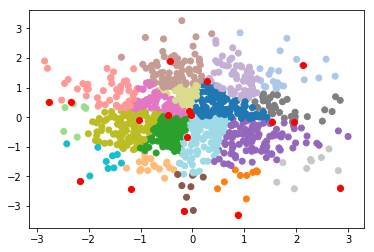

17
hopping with 125 points
radius 1.7425281371879473
beginning traversal! 125 items to traverse
checking 63 points
adding 2
2 in path
2
adding 4
4 in path
6
adding 3
3 in path
9
adding 2
2 in path
11
adding 2
2 in path
13
adding 2
2 in path
15
adding 3
3 in path
18
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


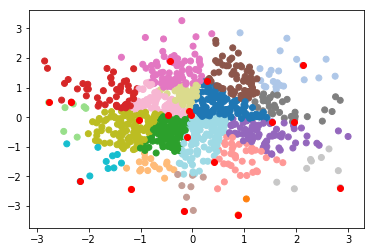

18
hopping with 125 points
radius 1.6470117197401886
beginning traversal! 125 items to traverse
checking 71 points
adding 3
3 in path
3
adding 4
4 in path
7
adding 3
3 in path
10
adding 3
3 in path
13
adding 2
2 in path
15
adding 2
2 in path
17
adding 2
2 in path
19
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


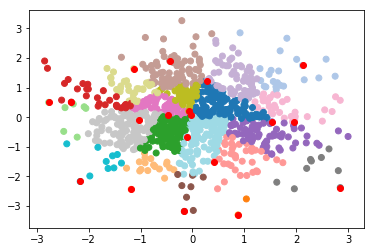

19
hopping with 125 points
radius 1.6326705705861642
beginning traversal! 125 items to traverse
checking 56 points
adding 4
4 in path
4
adding 3
3 in path
7
adding 3
3 in path
10
adding 2
2 in path
12
adding 2
2 in path
14
adding 2
2 in path
16
adding 4
4 in path
20
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


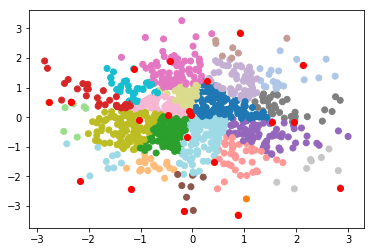

20
hopping with 125 points
radius 1.547630805893615
beginning traversal! 125 items to traverse
checking 52 points
adding 3
3 in path
3
adding 2
2 in path
5
adding 3
3 in path
8
adding 5
5 in path
13
adding 2
2 in path
15
adding 2
2 in path
17
adding 4
4 in path
21
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


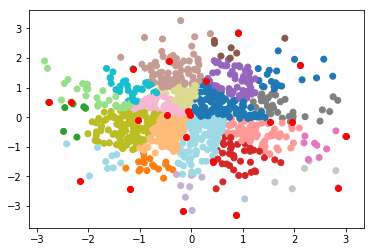

21
hopping with 125 points
radius 1.4817231640511355
beginning traversal! 125 items to traverse
checking 56 points
adding 2
2 in path
2
adding 5
5 in path
7
adding 3
3 in path
10
adding 4
4 in path
14
adding 2
2 in path
16
adding 2
2 in path
18
adding 4
4 in path
22
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


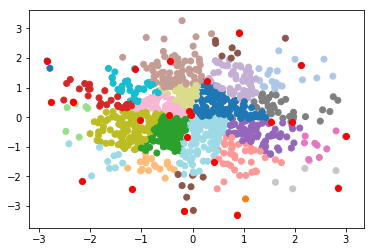

22
hopping with 125 points
radius 1.3738064270248422
beginning traversal! 125 items to traverse
checking 44 points
adding 5
5 in path
5
adding 2
2 in path
7
adding 3
3 in path
10
adding 4
4 in path
14
adding 4
4 in path
18
adding 2
2 in path
20
adding 3
3 in path
23
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


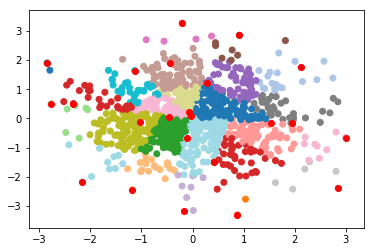

23
hopping with 125 points
radius 1.3209253706205437
beginning traversal! 125 items to traverse
checking 65 points
adding 3
3 in path
3
adding 2
2 in path
5
adding 4
4 in path
9
adding 4
4 in path
13
adding 2
2 in path
15
adding 3
3 in path
18
adding 6
6 in path
24
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


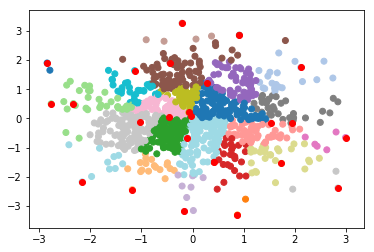

24
hopping with 125 points
radius 1.297729510395199
beginning traversal! 125 items to traverse
checking 49 points
adding 2
2 in path
2
adding 4
4 in path
6
adding 4
4 in path
10
adding 4
4 in path
14
adding 2
2 in path
16
adding 3
3 in path
19
adding 6
6 in path
25
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


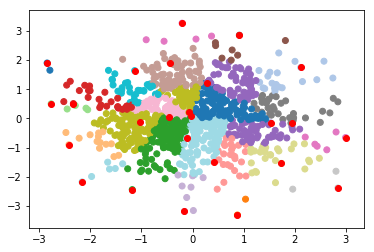

25
hopping with 125 points
radius 1.2910751266401879
beginning traversal! 125 items to traverse
checking 66 points
adding 4
4 in path
4
adding 2
2 in path
6
adding 4
4 in path
10
adding 4
4 in path
14
adding 6
6 in path
20
adding 3
3 in path
23
adding 3
3 in path
26
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


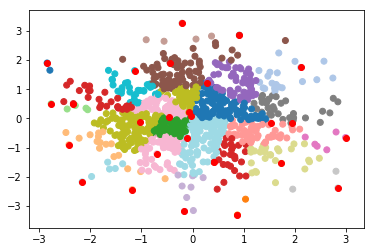

26
hopping with 125 points
radius 1.273060515835105
continuing
adding 1
1 in path
1
adding 2
2 in path
3
adding 3
3 in path
6
adding 4
4 in path
10
adding 4
4 in path
14
adding 6
6 in path
20
adding 3
3 in path
23
adding 4
4 in path
27
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


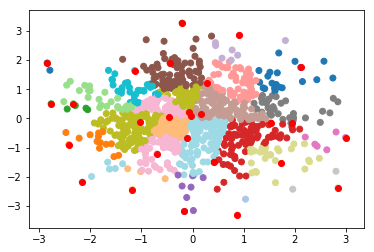

27
hopping with 125 points
radius 1.273060515835105
beginning traversal! 125 items to traverse
checking 59 points
adding 2
2 in path
2
adding 4
4 in path
6
adding 3
3 in path
9
adding 4
4 in path
13
adding 4
4 in path
17
adding 6
6 in path
23
adding 3
3 in path
26
adding 2
2 in path
28
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


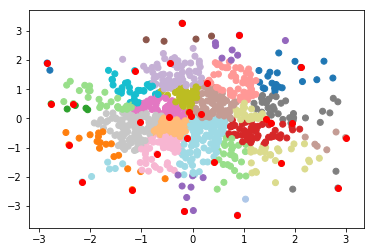

28
hopping with 125 points
radius 1.2562330711064678
beginning traversal! 125 items to traverse
checking 60 points
adding 4
4 in path
4
adding 4
4 in path
8
adding 3
3 in path
11
adding 4
4 in path
15
adding 2
2 in path
17
adding 6
6 in path
23
adding 3
3 in path
26
adding 3
3 in path
29
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


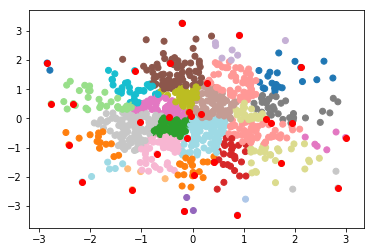

29
hopping with 125 points
radius 1.1730454995058326
beginning traversal! 125 items to traverse
checking 88 points
adding 4
4 in path
4
adding 5
5 in path
9
adding 3
3 in path
12
adding 4
4 in path
16
adding 2
2 in path
18
adding 6
6 in path
24
adding 3
3 in path
27
adding 3
3 in path
30
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


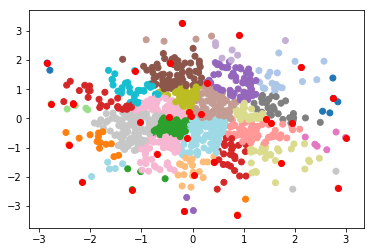

30
hopping with 125 points
radius 1.156003549051466
beginning traversal! 125 items to traverse
checking 80 points
adding 5
5 in path
5
adding 4
4 in path
9
adding 3
3 in path
12
adding 3
3 in path
15
adding 2
2 in path
17
adding 6
6 in path
23
adding 3
3 in path
26
adding 5
5 in path
31
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


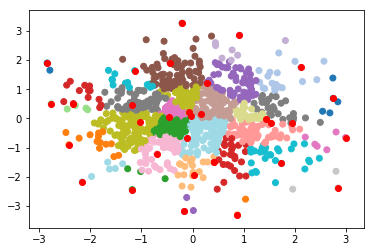

31
hopping with 125 points
radius 1.1175977311858056
beginning traversal! 125 items to traverse
checking 88 points
adding 4
4 in path
4
adding 2
2 in path
6
adding 3
3 in path
9
adding 3
3 in path
12
adding 5
5 in path
17
adding 6
6 in path
23
adding 3
3 in path
26
adding 6
6 in path
32
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


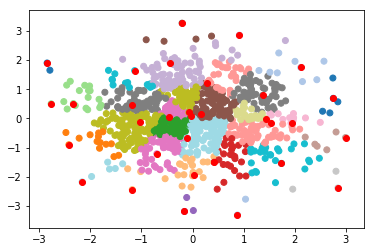

32
hopping with 125 points
radius 1.0387122656407122
beginning traversal! 125 items to traverse
checking 60 points
adding 2
2 in path
2
adding 3
3 in path
5
adding 3
3 in path
8
adding 6
6 in path
14
adding 5
5 in path
19
adding 6
6 in path
25
adding 3
3 in path
28
adding 5
5 in path
33
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]


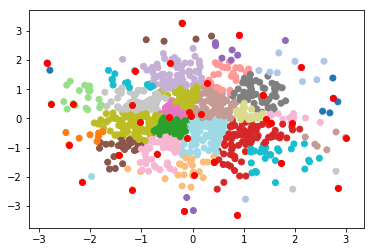

33
hopping with 125 points
radius 1.0265477283917932
beginning traversal! 125 items to traverse
checking 52 points
adding 3
3 in path
3
adding 6
6 in path
9
adding 3
3 in path
12
adding 5
5 in path
17
adding 5
5 in path
22
adding 6
6 in path
28
adding 3
3 in path
31
adding 3
3 in path
34
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]


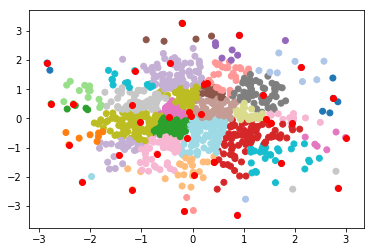

34
hopping with 125 points
radius 0.9572031099112689
beginning traversal! 125 items to traverse
checking 75 points
adding 6
6 in path
6
adding 5
5 in path
11
adding 3
3 in path
14
adding 3
3 in path
17
adding 5
5 in path
22
adding 6
6 in path
28
adding 3
3 in path
31
adding 4
4 in path
35
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]


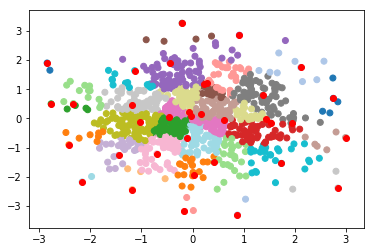

35
hopping with 125 points
radius 0.937806210340357
beginning traversal! 125 items to traverse
checking 60 points
adding 3
3 in path
3
adding 7
7 in path
10
adding 6
6 in path
16
adding 5
5 in path
21
adding 5
5 in path
26
adding 4
4 in path
30
adding 3
3 in path
33
adding 3
3 in path
36
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


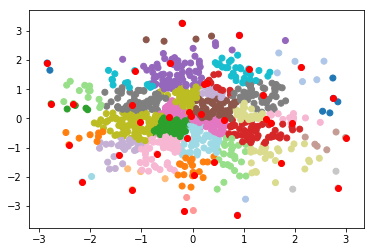

36
hopping with 125 points
radius 0.9340496379831598
beginning traversal! 125 items to traverse
checking 86 points
adding 6
6 in path
6
adding 7
7 in path
13
adding 3
3 in path
16
adding 4
4 in path
20
adding 5
5 in path
25
adding 4
4 in path
29
adding 3
3 in path
32
adding 5
5 in path
37
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


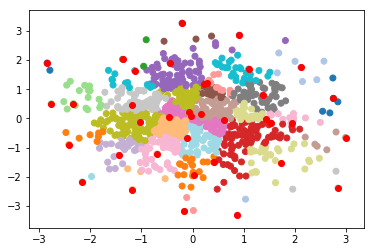

37
hopping with 125 points
radius 0.9241845044360115
beginning traversal! 125 items to traverse
checking 90 points
adding 7
7 in path
7
adding 4
4 in path
11
adding 3
3 in path
14
adding 7
7 in path
21
adding 5
5 in path
26
adding 4
4 in path
30
adding 3
3 in path
33
adding 5
5 in path
38
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


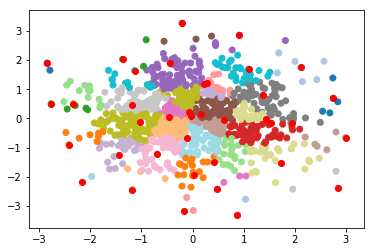

38
hopping with 125 points
radius 0.9205184778838679
beginning traversal! 125 items to traverse
checking 43 points
adding 4
4 in path
4
adding 7
7 in path
11
adding 3
3 in path
14
adding 5
5 in path
19
adding 5
5 in path
24
adding 4
4 in path
28
adding 3
3 in path
31
adding 8
8 in path
39
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


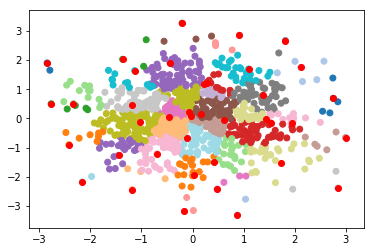

39
hopping with 125 points
radius 0.9131822378475503
beginning traversal! 125 items to traverse
checking 87 points
adding 7
7 in path
7
adding 5
5 in path
12
adding 3
3 in path
15
adding 5
5 in path
20
adding 5
5 in path
25
adding 4
4 in path
29
adding 3
3 in path
32
adding 8
8 in path
40
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


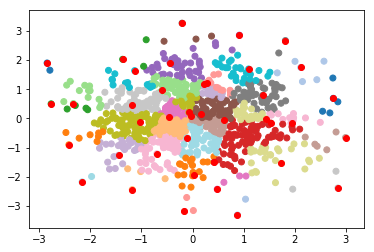

40
hopping with 125 points
radius 0.9102931301511066
beginning traversal! 125 items to traverse
checking 90 points
adding 5
5 in path
5
adding 8
8 in path
13
adding 3
3 in path
16
adding 5
5 in path
21
adding 5
5 in path
26
adding 4
4 in path
30
adding 3
3 in path
33
adding 8
8 in path
41
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


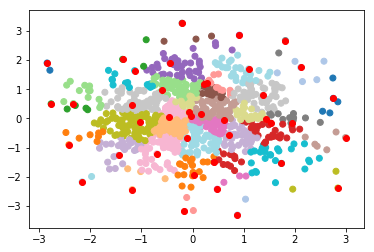

41
hopping with 125 points
radius 0.8951406238728555
beginning traversal! 125 items to traverse
checking 56 points
adding 8
8 in path
8
adding 5
5 in path
13
adding 3
3 in path
16
adding 8
8 in path
24
adding 5
5 in path
29
adding 4
4 in path
33
adding 3
3 in path
36
adding 6
6 in path
42
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


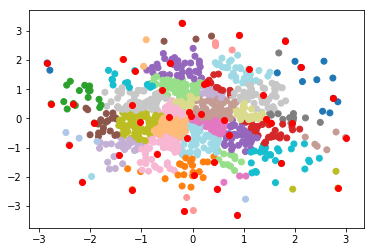

42
hopping with 125 points
radius 0.8850560478698816
beginning traversal! 125 items to traverse
checking 64 points
adding 5
5 in path
5
adding 9
9 in path
14
adding 3
3 in path
17
adding 5
5 in path
22
adding 6
6 in path
28
adding 4
4 in path
32
adding 3
3 in path
35
adding 8
8 in path
43
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


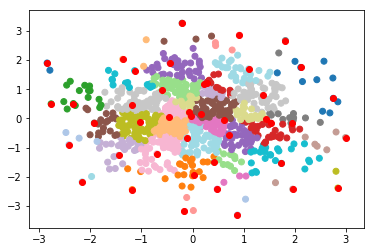

43
hopping with 125 points
radius 0.8124297459617278
beginning traversal! 125 items to traverse
checking 66 points
adding 6
6 in path
6
adding 9
9 in path
15
adding 3
3 in path
18
adding 5
5 in path
23
adding 6
6 in path
29
adding 4
4 in path
33
adding 3
3 in path
36
adding 8
8 in path
44
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


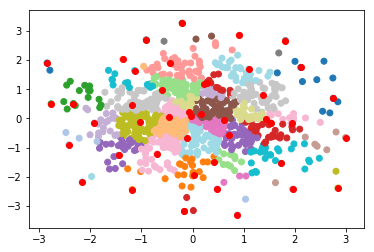

44
hopping with 125 points
radius 0.808941675800826
beginning traversal! 125 items to traverse
checking 68 points
adding 9
9 in path
9
adding 5
5 in path
14
adding 3
3 in path
17
adding 7
7 in path
24
adding 6
6 in path
30
adding 4
4 in path
34
adding 3
3 in path
37
adding 8
8 in path
45
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


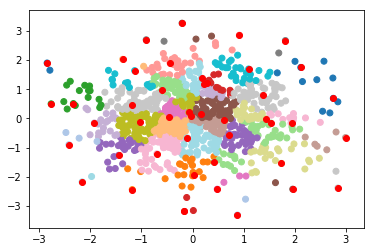

45
hopping with 125 points
radius 0.8070387479510351
beginning traversal! 125 items to traverse
checking 76 points
adding 3
3 in path
3
adding 5
5 in path
8
adding 4
4 in path
12
adding 7
7 in path
19
adding 6
6 in path
25
adding 8
8 in path
33
adding 3
3 in path
36
adding 10
10 in path
46
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


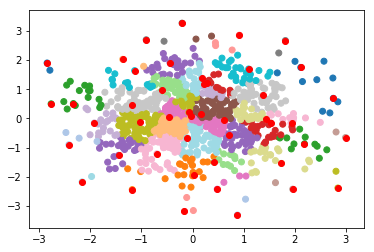

46
hopping with 125 points
radius 0.7873980376026167
beginning traversal! 125 items to traverse
checking 62 points
adding 5
5 in path
5
adding 7
7 in path
12
adding 4
4 in path
16
adding 10
10 in path
26
adding 6
6 in path
32
adding 8
8 in path
40
adding 3
3 in path
43
adding 4
4 in path
47
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


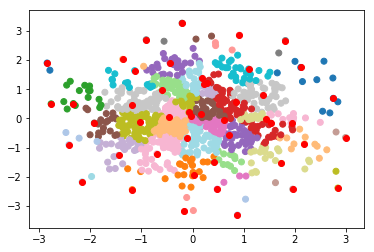

47
hopping with 125 points
radius 0.7648460936826296
beginning traversal! 125 items to traverse
checking 73 points
adding 4
4 in path
4
adding 7
7 in path
11
adding 3
3 in path
14
adding 10
10 in path
24
adding 6
6 in path
30
adding 8
8 in path
38
adding 4
4 in path
42
adding 6
6 in path
48
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]


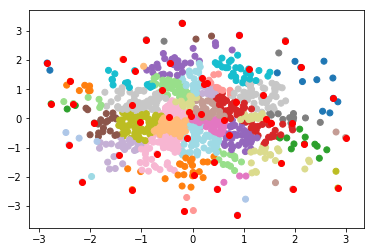

48
hopping with 125 points
radius 0.7530532512734943
beginning traversal! 125 items to traverse
checking 69 points
adding 3
3 in path
3
adding 7
7 in path
10
adding 8
8 in path
18
adding 10
10 in path
28
adding 6
6 in path
34
adding 6
6 in path
40
adding 4
4 in path
44
adding 5
5 in path
49
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


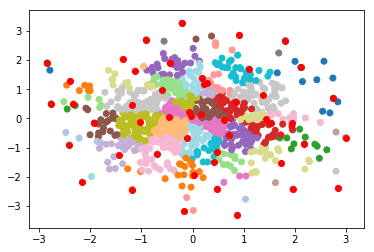

49
hopping with 125 points
radius 0.7443284702851993
beginning traversal! 125 items to traverse
checking 83 points
adding 7
7 in path
7
adding 10
10 in path
17
adding 8
8 in path
25
adding 4
4 in path
29
adding 6
6 in path
35
adding 6
6 in path
41
adding 4
4 in path
45
adding 5
5 in path
50
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


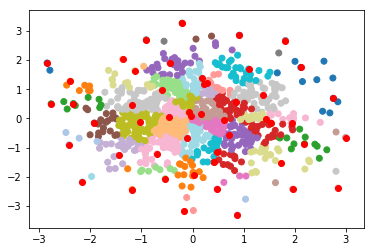

In [37]:
rgauss = np.random.normal(size=(1000,2))
th = treehopper(rgauss, splits=float('inf'), partition=PCATreePartition, max_partition_size=200)
for i in range(50):
    th.hop()
    cells = deepcopy([str(x) for x in th.get_vcells()])
    le = LabelEncoder()
    le.fit(cells)
    cells = le.transform(cells)
    
    #print(cells)
    print(np.unique(cells))
    plt.scatter(rgauss[:,0],rgauss[:,1],c=cells, cmap='tab20')
    plt.scatter(rgauss[th.path,0],rgauss[th.path,1],color='red')
    plt.show()

beginning traversal! 1000 items to traverse
[0]


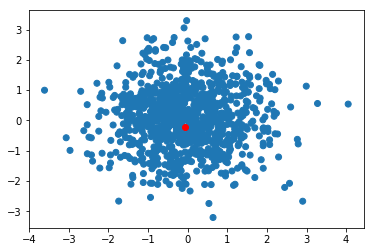

beginning traversal! 1000 items to traverse
checking 136 points
[0 1]


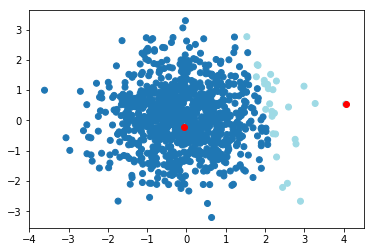

beginning traversal! 1000 items to traverse
checking 195 points
[0 1 2]


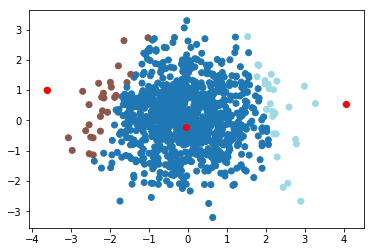

beginning traversal! 1000 items to traverse
checking 218 points
[0 1 2 3]


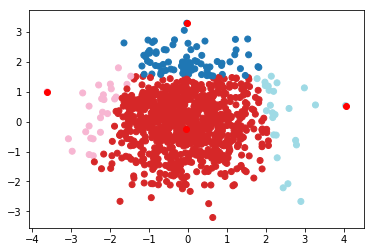

beginning traversal! 1000 items to traverse
checking 179 points
[0 1 2 3 4]


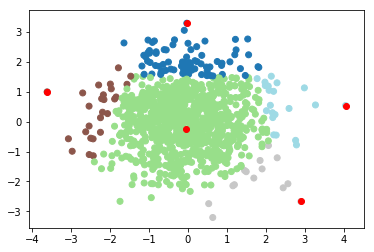

beginning traversal! 1000 items to traverse
checking 308 points
[0 1 2 3 4 5]


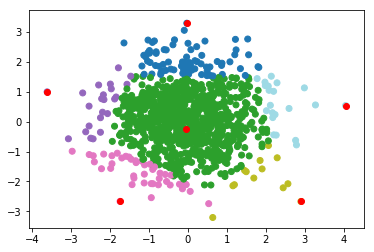

beginning traversal! 1000 items to traverse
checking 466 points
[0 1 2 3 4 5 6]


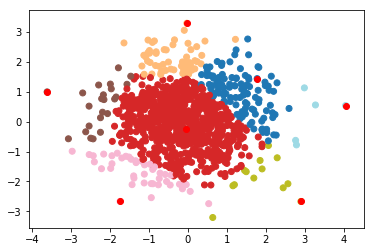

beginning traversal! 1000 items to traverse
checking 430 points
[0 1 2 3 4 5 6 7]


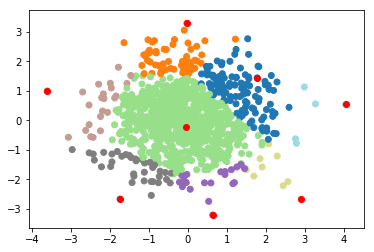

beginning traversal! 1000 items to traverse
checking 476 points
[0 1 2 3 4 5 6 7 8]


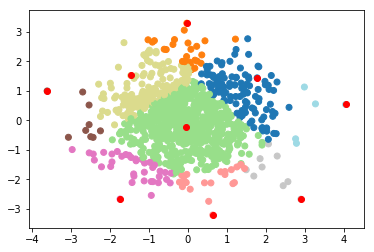

beginning traversal! 1000 items to traverse
checking 431 points
[0 1 2 3 4 5 6 7 8 9]


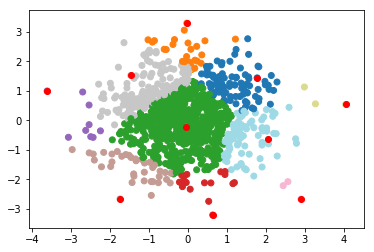

beginning traversal! 1000 items to traverse
checking 390 points
[ 0  1  2  3  4  5  6  7  8  9 10]


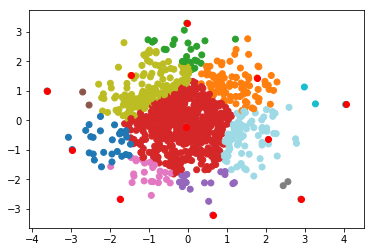

beginning traversal! 1000 items to traverse
checking 622 points
[ 0  1  2  3  4  5  6  7  8  9 10 11]


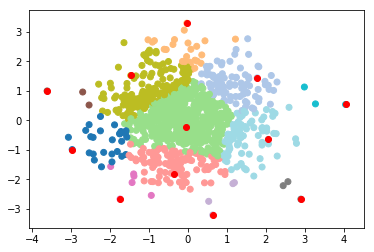

beginning traversal! 1000 items to traverse
checking 576 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


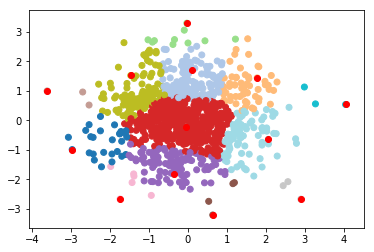

beginning traversal! 1000 items to traverse
checking 503 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


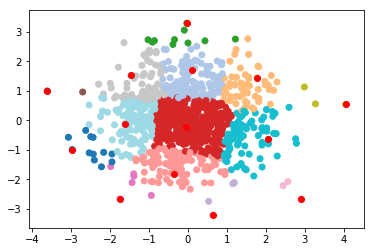

beginning traversal! 1000 items to traverse
checking 524 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


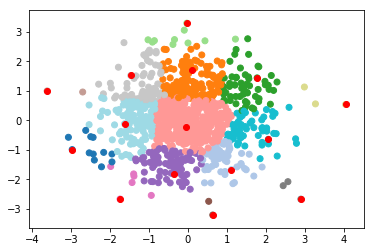

beginning traversal! 1000 items to traverse
checking 510 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


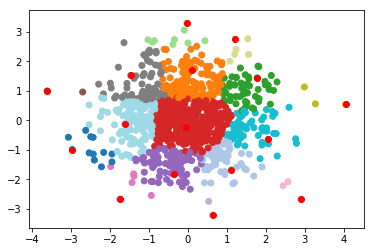

beginning traversal! 1000 items to traverse
checking 583 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


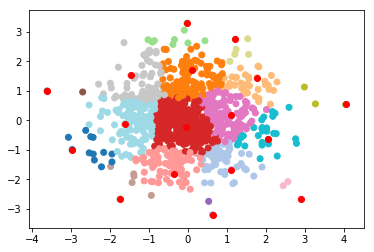

beginning traversal! 1000 items to traverse
checking 524 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


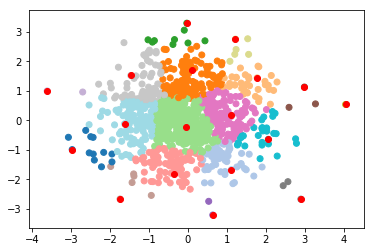

beginning traversal! 1000 items to traverse
checking 571 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


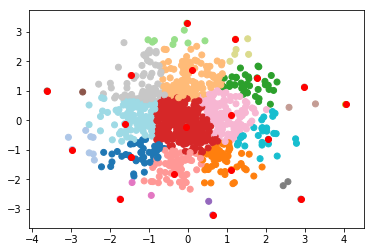

beginning traversal! 1000 items to traverse
checking 547 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


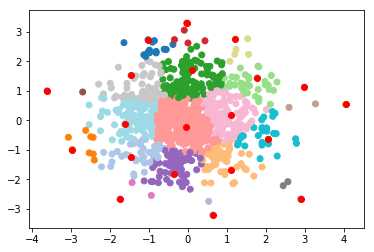

In [78]:
h = hopper(rgauss)
for i in range(20):
    h.hop()
    cells = deepcopy([str(x) for x in h.vcells])
    le = LabelEncoder()
    le.fit(cells)
    cells = le.transform(cells)
    
    #print(cells)
    print(np.unique(cells))
    plt.scatter(rgauss[:,0],rgauss[:,1],c=cells, cmap='tab20')
    plt.scatter(rgauss[h.path,0],rgauss[h.path,1],color='red')
    plt.show()

In [34]:
@interact
def grow(N=(0,100,1)):
    plt.scatter(rgauss[:,0],rgauss[:,1])
    plt.scatter(rgauss[th.path[:N],0],rgauss[th.path[:N],1])
    plt.show()

interactive(children=(IntSlider(value=50, description='N'), Output()), _dom_classes=('widget-interact',))

In [121]:


h = hopper(rgauss)
h.hop(10)
h.hop(20)

beginning traversal! 1000 items to traverse


[534,
 678,
 495,
 258,
 377,
 978,
 611,
 284,
 581,
 722,
 763,
 39,
 968,
 418,
 566,
 795,
 28,
 444,
 962,
 151,
 272,
 41,
 999,
 306,
 899,
 324,
 879,
 769,
 677,
 754]

In [11]:
[len(x) for x in h.vdict.values()]

[19,
 0,
 1,
 16,
 102,
 2,
 0,
 1,
 4,
 21,
 27,
 89,
 19,
 2,
 24,
 94,
 119,
 16,
 0,
 9,
 9,
 8,
 37,
 26,
 65,
 6,
 58,
 46,
 115,
 35]

In [14]:
smaller.obs['wt']

979     20
797      1
742      2
635     17
865    103
738      3
852      1
581      2
401      5
442     22
444     28
174     90
360     20
14       3
891     25
232     95
220    120
70      17
487      1
53      10
183     10
983      9
606     38
961     27
933     66
515      7
255     59
543     47
62     116
9       36
Name: wt, dtype: int64

Trying to set attribute `.obs` of view, making a copy.


Counter({220: 120, 62: 116, 865: 103, 232: 95, 174: 90, 933: 66, 255: 59, 543: 47, 606: 38, 9: 36, 444: 28, 961: 27, 891: 25, 442: 22, 360: 20, 979: 20, 70: 17, 635: 17, 183: 10, 53: 10, 983: 9, 515: 7, 401: 5, 14: 3, 738: 3, 581: 2, 742: 2, 487: 1, 797: 1, 852: 1})


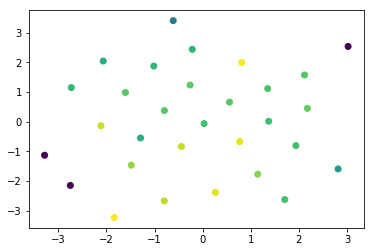

In [13]:
rgauss = sc.AnnData(rgauss)

smaller = e.compress(rgauss, h)
plt.scatter(smaller.X[:,0],smaller.X[:,1], c=h.rs)
plt.show()

In [16]:
smaller.obs['wt']

269    142
486      1
347      4
633      3
373      1
118      4
490      2
35      27
557     92
870      7
268      6
367     28
595    143
83      28
740      2
893     33
617     41
589     34
875      7
363      5
836    101
130      3
984    139
474      2
588     27
519      6
685     23
265     10
293      2
896     77
Name: wt, dtype: int64

In [11]:
sc.pp.neighbors(smaller)

/usr/local/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../../usr/local/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/usr/local/lib/python3.7/site-packages/numba/compiler.py:725: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../../usr/local/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/usr/local/lib/python3.7/site-packages/numba/compiler.py:734: NumbaDeprecationWarning: 
Fall-back from the nopython compilation 

In [14]:
sc.tl.louvain(smaller)

In [22]:
c1=e.filter(smaller, 'louvain',['1'])

In [26]:
expanded = e.expand(c1, rgauss)

[98, 30, 680, 495, 759, 933, 463, 764, 68, 744]
[887, 132, 132, 68, 531, 155, 132, 236, 784, 764, 236, 332, 132, 220, 764, 236, 556, 531, 132, 67, 132, 784, 495, 764, 764, 220, 236, 531, 132, 132, 30, 236, 988, 67, 796, 495, 495, 887, 236, 386, 386, 132, 887, 744, 332, 495, 495, 220, 531, 764, 132, 764, 67, 796, 949, 386, 68, 887, 236, 887, 132, 531, 784, 30, 448, 495, 386, 67, 68, 764, 531, 784, 132, 67, 386, 386, 236, 386, 796, 236, 529, 236, 796, 132, 132, 764, 529, 386, 764, 556, 764, 386, 386, 796, 132, 495, 764, 236, 98, 236, 386, 495, 531, 132, 132, 236, 236, 680, 386, 236, 132, 796, 638, 132, 764, 531, 764, 463, 764, 386, 132, 887, 495, 132, 448, 764, 680, 386, 887, 236, 887, 495, 132, 132, 332, 236, 448, 495, 887, 67, 140, 764, 132, 132, 495, 796, 784, 680, 236, 531, 386, 236, 495, 764, 386, 155, 887, 933, 933, 796, 68, 332, 132, 386, 531, 67, 495, 887, 796, 495, 236, 236, 531, 289, 764, 68, 796, 332, 132, 796, 933, 386, 796, 764, 132, 949, 668, 796, 236, 495, 495, 236, 386, 2

In [19]:
list(smaller.obs['louvain'])

['0',
 '2',
 '2',
 '1',
 '0',
 '1',
 '2',
 '0',
 '2',
 '1',
 '0',
 '1',
 '0',
 '2',
 '2',
 '0',
 '1',
 '2',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2']

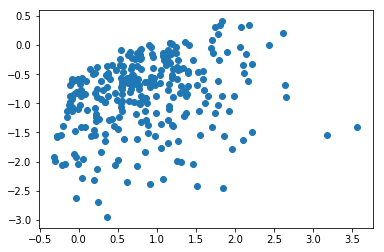

In [27]:
plt.scatter(expanded.X[:,0], expanded.X[:,1])

In [7]:
np.where([x in [1,2] for x in [1,2,3,4,5]])[0]

array([0, 1])

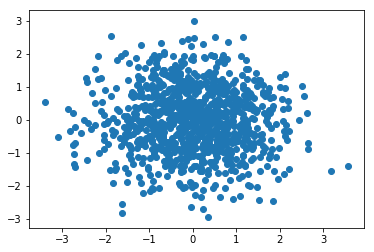

In [8]:
plt.scatter(rgauss.X[:,0],rgauss.X[:,1])